<a href="https://colab.research.google.com/github/ray1stsa/DataSciencePortfolio/blob/main/DSNDProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
data = pd.read_csv('all_games.csv')
data

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


In [5]:
data.describe()

,meta_score
count,18800.000000
mean,70.648883
std,12.225006
min,20.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,99.000000


# after giving a quick look for the data, we can now determine few questions behind it, which of these are :

1. *What factors contribute the most to the success of a game?*



-- We aim with this question is to identify the features or aspects of a game (such as platform or release date) that are most correlated with high user ratings or meta scores.




2. *How does the release platform affect the game's success?*



-- The goal here is to examine if games on certain platforms tend to perform better (higher Meta Scores and User Reviews) than others.





3. *Does the release date affect the game's performance in terms of Meta Score and User Review?*



-- With this question, we are seeking to explore if games released in certain years or time periods perform better compared to others.



---


now Enough with questions, let us start answering it! getting started prepare our data to answer our questions with the power of analyzing the data + visualizing it, starting first with dealing the data that could corrupt our work, such the categorical and missing data.



---

starting now with the 'release date' column, 'release date' is on an format of Object, thus we will change it to datetime format



In [6]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')



---



Now dealing with the categorical data:
The 'platform' column contains categorical values representing different gaming platforms. These will be encoded using techniques like One-Hot Encoding for analysis.

In [7]:
data['platform'].str.strip()
platform_dummies = pd.get_dummies(data['platform'], prefix='platform')

In [8]:
platform_dummies = platform_dummies.astype(int)

In [9]:
platform_dummies

,platform_ 3DS,platform_ DS,platform_ Dreamcast,platform_ Game Boy Advance,platform_ GameCube,platform_ Nintendo 64,platform_ PC,platform_ PSP,platform_ PlayStation,platform_ PlayStation 2,...,platform_ PlayStation 5,platform_ PlayStation Vita,platform_ Stadia,platform_ Switch,platform_ Wii,platform_ Wii U,platform_ Xbox,platform_ Xbox 360,platform_ Xbox One,platform_ Xbox Series X
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18798,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data['user_review']= pd.to_numeric(data['user_review'], errors='coerce')
data['meta_score']= pd.to_numeric(data['meta_score'], errors='coerce')

In [11]:
data_prep = pd.concat([data, platform_dummies], axis=1)

In [12]:
data_prep = data_prep.drop(['platform', 'summary'], axis=1)

In [13]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   name                        18800 non-null  object        
 1   release_date                18800 non-null  datetime64[ns]
 2   meta_score                  18800 non-null  int64         
 3   user_review                 17435 non-null  float64       
 4   platform_ 3DS               18800 non-null  int64         
 5   platform_ DS                18800 non-null  int64         
 6   platform_ Dreamcast         18800 non-null  int64         
 7   platform_ Game Boy Advance  18800 non-null  int64         
 8   platform_ GameCube          18800 non-null  int64         
 9   platform_ Nintendo 64       18800 non-null  int64         
 10  platform_ PC                18800 non-null  int64         
 11  platform_ PSP               18800 non-null  int64     

In [14]:
data_prep['user_review'].dropna(inplace=True)

Now, we are gonna do our analysis after we prepared the data in a good way, by turning our categorical data into numerical, eliminating the unnecesarry data such as the 'summary' column,


Now we can explore correlations between platforms, release dates, and game success of which will be measured by 'meta_score' and 'user_review'.

In [15]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   name                        18800 non-null  object        
 1   release_date                18800 non-null  datetime64[ns]
 2   meta_score                  18800 non-null  int64         
 3   user_review                 17435 non-null  float64       
 4   platform_ 3DS               18800 non-null  int64         
 5   platform_ DS                18800 non-null  int64         
 6   platform_ Dreamcast         18800 non-null  int64         
 7   platform_ Game Boy Advance  18800 non-null  int64         
 8   platform_ GameCube          18800 non-null  int64         
 9   platform_ Nintendo 64       18800 non-null  int64         
 10  platform_ PC                18800 non-null  int64         
 11  platform_ PSP               18800 non-null  int64     

In [17]:
data_prep['release_year'] = data_prep['release_date'].dt.year
data_prep['release_quarter'] = data['release_date'].dt.quarter
avg_meta_score_by_year = data_prep.groupby('release_year')['meta_score'].mean()
avg_meta_score_by_quarter = data_prep.groupby('release_quarter')['meta_score'].mean()

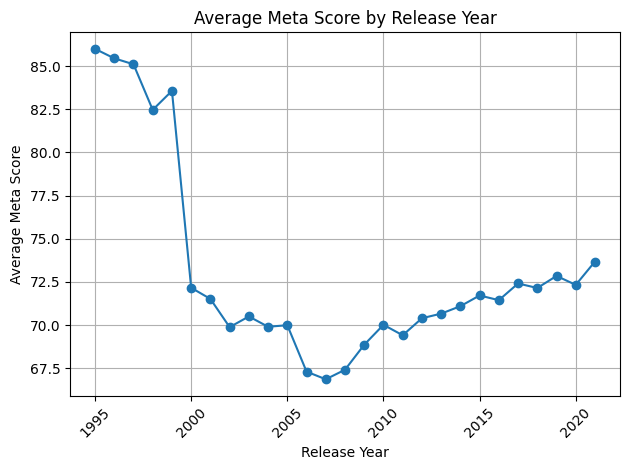

In [18]:
# Line plot for average meta score by release year
plt.plot(avg_meta_score_by_year.index, avg_meta_score_by_year.values, marker='o')
plt.title('Average Meta Score by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Meta Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This visualization shows the trend of the average Meta Score by release year. This provides insight into how games' quality (based on Meta Scores) has evolved over time, which helps address the question of whether release date affects game performance.



Now let us start analyzing the impact of the platform on game success by comparing the average Meta Scores across different platforms.

<ipython-input-21-8fba2c99a818>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_quarter', y='meta_score', data=avg_meta_score_by_quarter, palette=colors)


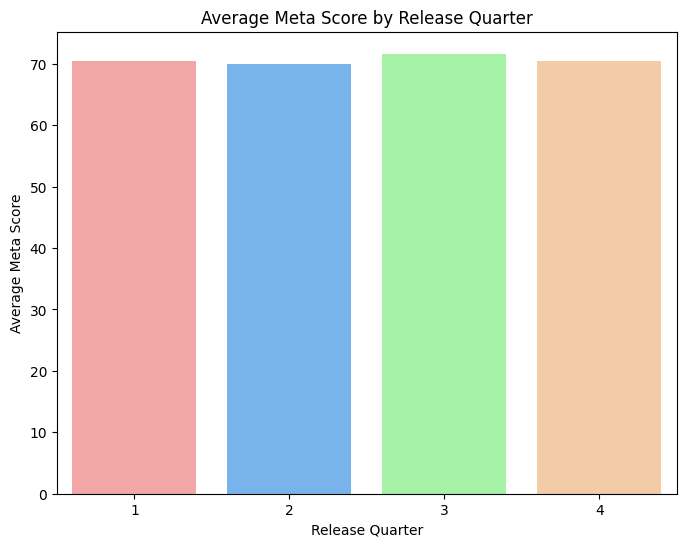

In [21]:
avg_meta_score_by_quarter = data_prep.groupby('release_quarter')['meta_score'].mean().reset_index()

plt.figure(figsize=(8, 6))
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
sns.barplot(x='release_quarter', y='meta_score', data=avg_meta_score_by_quarter, palette=colors)
plt.title('Average Meta Score by Release Quarter')
plt.xlabel('Release Quarter')
plt.ylabel('Average Meta Score')
plt.show()

In [28]:
platform_columns = [col for col in data_prep.columns if col.startswith('platform_')]
avg_meta_score_by_platform = data_prep[platform_columns + ['meta_score']].groupby(platform_columns).mean()

# Reshaping data for bar plot
avg_meta_score_by_platform = avg_meta_score_by_platform.reset_index()
avg_meta_score_by_platform = avg_meta_score_by_platform.melt(id_vars='meta_score', var_name='Platform', value_name='Present')
avg_meta_score_by_platform = avg_meta_score_by_platform[avg_meta_score_by_platform['Present'] == 1]


<ipython-input-40-a70f3d63ac18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='meta_score', y='Platform', data=avg_meta_score_by_platform, palette='Blues_d')


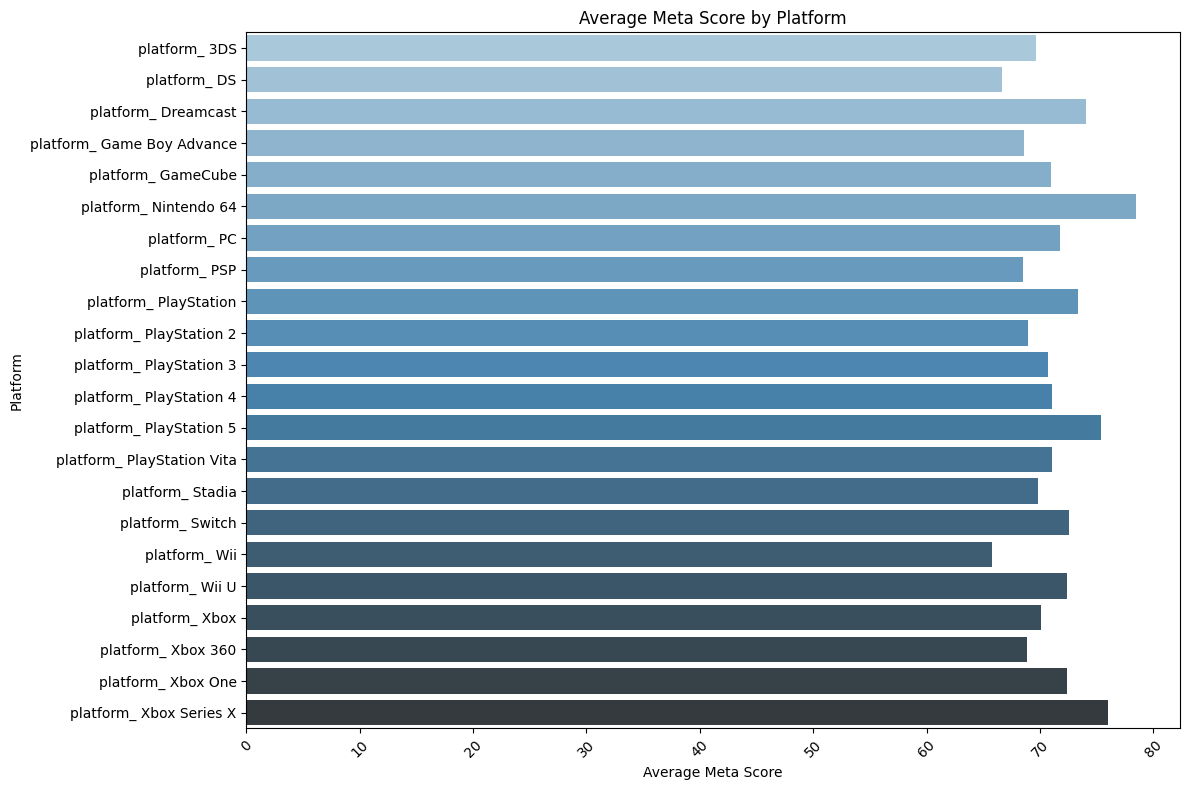

In [40]:
plt.figure(figsize=(12, 8))
sns.barplot(x='meta_score', y='Platform', data=avg_meta_score_by_platform, palette='Blues_d')
plt.title('Average Meta Score by Platform')
plt.xticks(rotation=45)
plt.ylabel('Platform')
plt.xlabel('Average Meta Score')
plt.tight_layout()
plt.show()

<ipython-input-39-6a917f0f836a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='user_review', y='platform', data=avg_user_review_by_platform, palette='Blues_d')


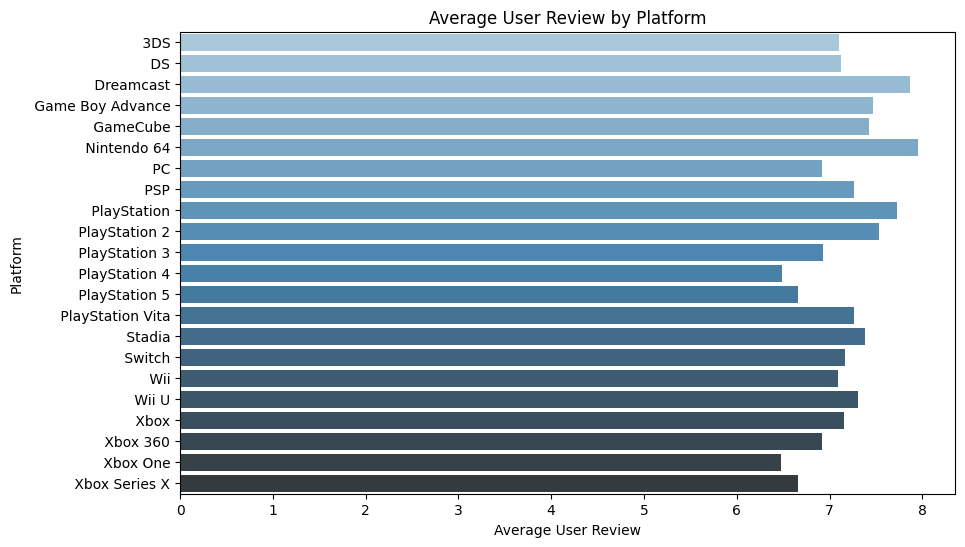

In [39]:
data = data.dropna(subset=['user_review'])
avg_user_review_by_platform = data.groupby('platform')['user_review'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='user_review', y='platform', data=avg_user_review_by_platform, palette='Blues_d')
plt.title('Average User Review by Platform')
plt.xlabel('Average User Review')
plt.ylabel('Platform')
plt.show()

this bar chart shows the average Meta Score for games on different platforms.
This provides insights into which platforms tend to host higher-rated games, addressing the question of how the release platform affects a game's success.



---



---

now in the era of the AI, we can say that many video game development studios and companies might need some predictive models to improve their business work,

Choosing the machine learning model depends on what the customer's plans for their future work, for instance if the goal is to predict Meta Scores or User Reviews based on the available features, a regresion model would be the best option.

If the goal is to classify games into high-rated and low-rated categories, then a classification model would be more appropriate.

If your focus is on predicting Meta Scores or User Reviews over time (e.g., forecasting how the game industry is evolving), you could treat the release date as a time series feature and use the ARIMA or SARIMAX models.


the best model we can implement for this dataset based on its structure And its complexity of the interactions and the goals of our analysis, the XGBoost for both regression and classification is the best one



For Classification tasks : XGBoost can handle the non-linear relationships between features like platform, release date, and the target variable (high or low Meta Score). It’s known for its efficiency and high performance, especially in structured datasets like this one.

For Regression : XGBoost also works well in regression tasks and can capture complex relationships between features. It performs better than simpler models like linear regression because it can model interactions between features and learn non-linear patterns.

and since this, i will simply do a regression model using XGBoost regressor to predict the meta scores of te upcoming games based on the features.

In [41]:
data_prep['release_year'] = data_prep['release_date'].dt.year
data_prep['release_month'] = data_prep['release_date'].dt.month
data_prep['release_day'] = data_prep['release_date'].dt.day

In [42]:
data_prep

,name,release_date,meta_score,user_review,platform_ 3DS,platform_ DS,platform_ Dreamcast,platform_ Game Boy Advance,platform_ GameCube,platform_ Nintendo 64,...,platform_ Wii,platform_ Wii U,platform_ Xbox,platform_ Xbox 360,platform_ Xbox One,platform_ Xbox Series X,release_year,release_quarter,release_month,release_day
0,The Legend of Zelda: Ocarina of Time,1998-11-23,99,9.1,0,0,0,0,0,1,...,0,0,0,0,0,0,1998,4,11,23
1,Tony Hawk's Pro Skater 2,2000-09-20,98,7.4,0,0,0,0,0,0,...,0,0,0,0,0,0,2000,3,9,20
2,Grand Theft Auto IV,2008-04-29,98,7.7,0,0,0,0,0,0,...,0,0,0,0,0,0,2008,2,4,29
3,SoulCalibur,1999-09-08,98,8.4,0,0,1,0,0,0,...,0,0,0,0,0,0,1999,3,9,8
4,Grand Theft Auto IV,2008-04-29,98,7.9,0,0,0,0,0,0,...,0,0,0,1,0,0,2008,2,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,2013-05-21,22,1.3,0,0,0,0,0,0,...,0,0,0,1,0,0,2013,2,5,21
18796,Drake of the 99 Dragons,2003-11-03,22,1.7,0,0,0,0,0,0,...,0,0,1,0,0,0,2003,4,11,3
18797,Afro Samurai 2: Revenge of Kuma Volume One,2015-09-22,21,2.9,0,0,0,0,0,0,...,0,0,0,0,0,0,2015,3,9,22
18798,Infestation: Survivor Stories (The War Z),2012-10-15,20,1.7,0,0,0,0,0,0,...,0,0,0,0,0,0,2012,4,10,15


In [43]:
from xgboost import XGBRegressor

In [44]:
data_prep.drop(columns='release_date')

,name,meta_score,user_review,platform_ 3DS,platform_ DS,platform_ Dreamcast,platform_ Game Boy Advance,platform_ GameCube,platform_ Nintendo 64,platform_ PC,...,platform_ Wii,platform_ Wii U,platform_ Xbox,platform_ Xbox 360,platform_ Xbox One,platform_ Xbox Series X,release_year,release_quarter,release_month,release_day
0,The Legend of Zelda: Ocarina of Time,99,9.1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1998,4,11,23
1,Tony Hawk's Pro Skater 2,98,7.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2000,3,9,20
2,Grand Theft Auto IV,98,7.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2008,2,4,29
3,SoulCalibur,98,8.4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1999,3,9,8
4,Grand Theft Auto IV,98,7.9,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2008,2,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,22,1.3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2013,2,5,21
18796,Drake of the 99 Dragons,22,1.7,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2003,4,11,3
18797,Afro Samurai 2: Revenge of Kuma Volume One,21,2.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2015,3,9,22
18798,Infestation: Survivor Stories (The War Z),20,1.7,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2012,4,10,15


In [57]:
data_prep

,name,release_date,meta_score,user_review,platform_ 3DS,platform_ DS,platform_ Dreamcast,platform_ Game Boy Advance,platform_ GameCube,platform_ Nintendo 64,...,platform_ Wii,platform_ Wii U,platform_ Xbox,platform_ Xbox 360,platform_ Xbox One,platform_ Xbox Series X,release_year,release_quarter,release_month,release_day
0,The Legend of Zelda: Ocarina of Time,1998-11-23,99,9.1,0,0,0,0,0,1,...,0,0,0,0,0,0,1998,4,11,23
1,Tony Hawk's Pro Skater 2,2000-09-20,98,7.4,0,0,0,0,0,0,...,0,0,0,0,0,0,2000,3,9,20
2,Grand Theft Auto IV,2008-04-29,98,7.7,0,0,0,0,0,0,...,0,0,0,0,0,0,2008,2,4,29
3,SoulCalibur,1999-09-08,98,8.4,0,0,1,0,0,0,...,0,0,0,0,0,0,1999,3,9,8
4,Grand Theft Auto IV,2008-04-29,98,7.9,0,0,0,0,0,0,...,0,0,0,1,0,0,2008,2,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,2013-05-21,22,1.3,0,0,0,0,0,0,...,0,0,0,1,0,0,2013,2,5,21
18796,Drake of the 99 Dragons,2003-11-03,22,1.7,0,0,0,0,0,0,...,0,0,1,0,0,0,2003,4,11,3
18797,Afro Samurai 2: Revenge of Kuma Volume One,2015-09-22,21,2.9,0,0,0,0,0,0,...,0,0,0,0,0,0,2015,3,9,22
18798,Infestation: Survivor Stories (The War Z),2012-10-15,20,1.7,0,0,0,0,0,0,...,0,0,0,0,0,0,2012,4,10,15


In [59]:
data_prep.drop('release_date', axis=1)

,name,meta_score,user_review,platform_ 3DS,platform_ DS,platform_ Dreamcast,platform_ Game Boy Advance,platform_ GameCube,platform_ Nintendo 64,platform_ PC,...,platform_ Wii,platform_ Wii U,platform_ Xbox,platform_ Xbox 360,platform_ Xbox One,platform_ Xbox Series X,release_year,release_quarter,release_month,release_day
0,The Legend of Zelda: Ocarina of Time,99,9.1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1998,4,11,23
1,Tony Hawk's Pro Skater 2,98,7.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2000,3,9,20
2,Grand Theft Auto IV,98,7.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2008,2,4,29
3,SoulCalibur,98,8.4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1999,3,9,8
4,Grand Theft Auto IV,98,7.9,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2008,2,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,22,1.3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2013,2,5,21
18796,Drake of the 99 Dragons,22,1.7,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2003,4,11,3
18797,Afro Samurai 2: Revenge of Kuma Volume One,21,2.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2015,3,9,22
18798,Infestation: Survivor Stories (The War Z),20,1.7,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2012,4,10,15


In [67]:
data = data_prep.copy()

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        18800 non-null  object 
 1   meta_score                  18800 non-null  int64  
 2   user_review                 17435 non-null  float64
 3   platform_ 3DS               18800 non-null  int64  
 4   platform_ DS                18800 non-null  int64  
 5   platform_ Dreamcast         18800 non-null  int64  
 6   platform_ Game Boy Advance  18800 non-null  int64  
 7   platform_ GameCube          18800 non-null  int64  
 8   platform_ Nintendo 64       18800 non-null  int64  
 9   platform_ PC                18800 non-null  int64  
 10  platform_ PSP               18800 non-null  int64  
 11  platform_ PlayStation       18800 non-null  int64  
 12  platform_ PlayStation 2     18800 non-null  int64  
 13  platform_ PlayStation 3     188

In [81]:
data.to_csv('data_prep.csv', index=False)

In [70]:
data['release_year'].astype(int)
data['release_month'].astype(int)
data['release_day'].astype(int)

,release_day
0,23
1,20
2,29
3,8
4,29
...,...
18795,21
18796,3
18797,22
18798,15


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        18800 non-null  object 
 1   meta_score                  18800 non-null  int64  
 2   user_review                 17435 non-null  float64
 3   platform_ 3DS               18800 non-null  int64  
 4   platform_ DS                18800 non-null  int64  
 5   platform_ Dreamcast         18800 non-null  int64  
 6   platform_ Game Boy Advance  18800 non-null  int64  
 7   platform_ GameCube          18800 non-null  int64  
 8   platform_ Nintendo 64       18800 non-null  int64  
 9   platform_ PC                18800 non-null  int64  
 10  platform_ PSP               18800 non-null  int64  
 11  platform_ PlayStation       18800 non-null  int64  
 12  platform_ PlayStation 2     18800 non-null  int64  
 13  platform_ PlayStation 3     188

In [73]:
data = data.dropna(subset=['meta_score'])
X = data.drop(columns=['meta_score'])
y = data['meta_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.drop(columns=['name'])
X_test = X_test.drop(columns=['name'])
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

xgb_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("MSE:", mse)
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 85.11133691066931
R2 Score: 0.4167362946895963


the model we did for this dataset we recieved an R2 score of 0.41, which is let us say....slightly down the expectations, but that is okay, the dataset we have chosen is actually missing very important features such as the game genre, the publisher, developer and more game-metrics that could determine the best option for the data, with this dataset, we can say this is the best, we just need more features to improve our work

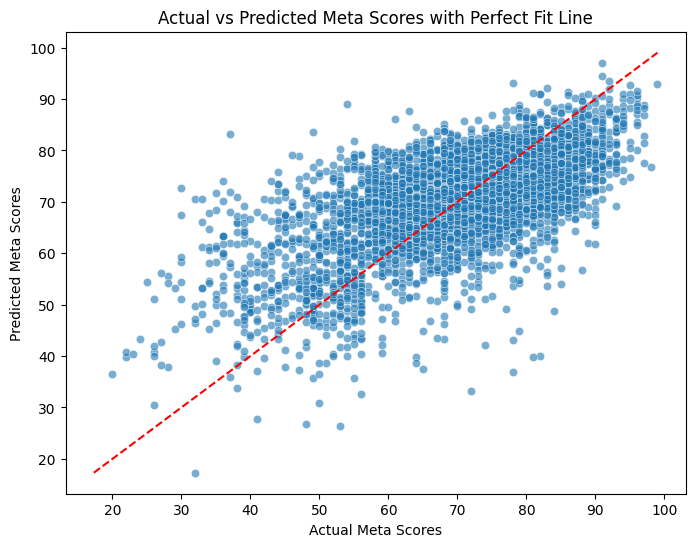

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--')
plt.xlabel('Actual Meta Scores')
plt.ylabel('Predicted Meta Scores')
plt.title('Actual vs Predicted Meta Scores with Perfect Fit Line')
plt.show()

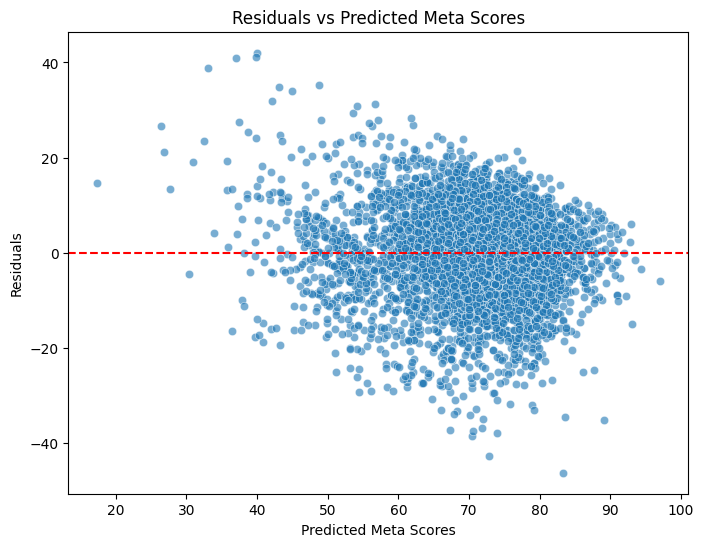

In [77]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Meta Scores')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Meta Scores')
plt.show()
